In [0]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import cv2

from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from tqdm import tqdm

currentDirectory = os.getcwd()

DATADIR = "/content/drive/My Drive/images/FEI+JAFFE" #Change the directory if using ur own pc
TESTDIR = "/content/drive/My Drive/images/Testing Data IU"
CATEGORIES = ["Happy","Sad"] #Happy = 0, Sad = 1
IMG_SIZE = 100

In [4]:
def create_training_data():
    TRAINING_DATA = []
    for category in CATEGORIES: 
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category) # Label of the image

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                TRAINING_DATA.append([new_array, class_num])
            except Exception as e:  
                pass
    return TRAINING_DATA
    
TRAINING_DATA = create_training_data()
print("\n")

100%|██████████| 334/334 [01:51<00:00,  2.99it/s]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

def create_test_data():
    Testing_Data = []
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TESTDIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                Testing_Data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
    return Testing_Data
TESTING_DATA = create_test_data()

100%|██████████| 9/9 [00:00<00:00, 134.61it/s]


In [0]:
import random
#random.shuffle(TRAINING_DATA)
random.shuffle(TESTING_DATA)

In [0]:
X = []
Y = []
print(len(TRAINING_DATA))
for features,label in TRAINING_DATA:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, 100, 100, 1)
Y = np.array(Y)


NameError: ignored

In [0]:
X_TEST = []
Y_TEST = []

for features,label in TESTING_DATA:
    X_TEST.append(features)
    Y_TEST.append(label)
    
X_TEST = np.array(X_TEST).reshape(-1, 100, 100, 1)
Y_TEST = np.array(Y_TEST)
print(len(X_TEST))

20


In [0]:
import pickle

pickle_out = open("/content/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/y.pickle","wb")#write book
pickle.dump(Y, pickle_out)
pickle_out.close()

In [0]:
import pickle
pickle_in = open("/content/X.pickle","rb")#read book
X = pickle.load(pickle_in)

pickle_in = open("/content/y.pickle","rb")
Y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [0]:
X = X/255.0

model = Sequential()

#Must be in this order
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))#rectify linear
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, batch_size=32, epochs=7, validation_split=0.3)

Epoch 1/7
14/14 [==============================] - 73s 5s/step - loss: 1.3838 - accuracy: 0.4988 - val_loss: 0.6916 - val_accuracy: 0.4728
Epoch 2/7
14/14 [==============================] - 72s 5s/step - loss: 0.6877 - accuracy: 0.5315 - val_loss: 0.6882 - val_accuracy: 0.5598
Epoch 3/7
14/14 [==============================] - 72s 5s/step - loss: 0.6713 - accuracy: 0.5315 - val_loss: 0.6879 - val_accuracy: 0.5054
Epoch 4/7
14/14 [==============================] - 72s 5s/step - loss: 0.6605 - accuracy: 0.5851 - val_loss: 0.6768 - val_accuracy: 0.5543
Epoch 5/7
14/14 [==============================] - 72s 5s/step - loss: 0.6290 - accuracy: 0.6434 - val_loss: 0.6734 - val_accuracy: 0.5326
Epoch 6/7
14/14 [==============================] - 73s 5s/step - loss: 0.5439 - accuracy: 0.7413 - val_loss: 0.6137 - val_accuracy: 0.6250
Epoch 7/7
14/14 [==============================] - 72s 5s/step - loss: 0.4583 - accuracy: 0.7972 - val_loss: 0.4935 - val_accuracy: 0.7609


In [0]:

model.evaluate(X_TEST ,Y_TEST,batch_size=1)

40/40 [==============================] - 2s 54ms/step - loss: 45.5399 - accuracy: 0.5000


[45.539859771728516, 0.5]

In [0]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=40) #10,30,100
rfc.fit(X.reshape(len(X), -1), Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
rfc.score(X_TEST.reshape(len(X_TEST), -1),Y_TEST)
y_pred = rfc.predict(X_TEST.reshape(len(X_TEST), -1))

<Figure size 864x576 with 0 Axes>

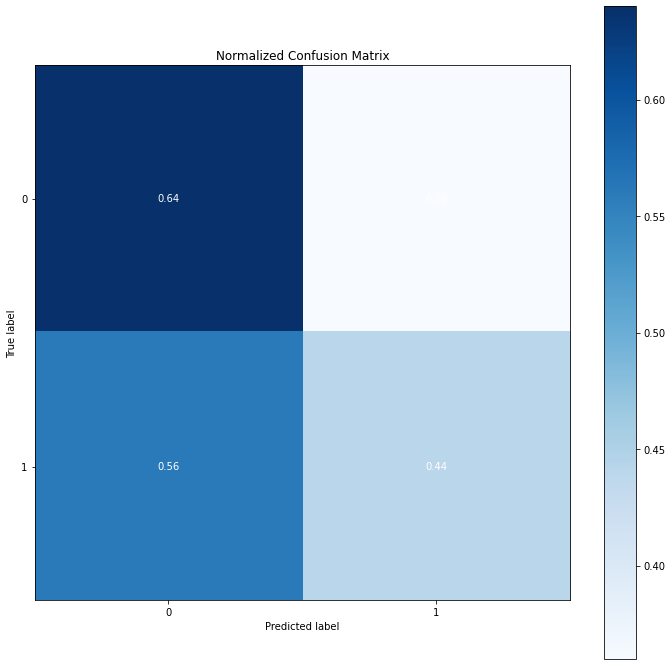

In [0]:
import scikitplot as skplt
plt.figure(figsize=(12,8))
f,ax=plt.subplots(1,1,figsize=(12,12))
#sklearn.metrics.plot_confusion_matrix(rfc,y_test, y_pred)
skplt.metrics.plot_confusion_matrix(Y_TEST, y_pred, normalize='true',ax=ax)
plt.show()